# Analyzing Advanced Metrics of Wide Receiver Play in the NFL
## Krishnan Chander

The sport of American football, especially at the professional level in the National Football League (NFL), has seen an evolution over the last century to an offensive style dominated by the passing game. Even though running plays still play a vital role in moving the ball down the field, the efficiency of quarterbacks passing the ball forward and the lower chance of injuries sustained than when running the ball has led to the passing game being the primary style of all 32 NFL offensive units. This has led to the main school of thought around building a team's offense, whether through the draft, free agency or trading, being that not only is it vital to acquire a quarterback who can sling the ball with strength and accuracy, but that there are weapons for that quarterback in the form of wide receivers, tight ends, etc. who can not only make secure catches but also run the ball down the field after the catch and hopefully get a touchdown.  

Physical measurables like size, strength and speed do help when considering which players to draft from college or sign when making either a free agency acquisition or trade. However, measurables are only part of the story; the ability of offensive coaches, whether at the head position or at an assistant level, to utilize the skillset of these players in moving the ball down the field by creating a variety of play packages that incorporate different formations and schemes that require different kinds of route running to get open and gain yards after the catch. Not only do the results of the play calls vary by team, but they actually have dependence on receiving position, as even running backs are being utilized frequently in catching passes on top of receivers and tight ends.  

The objective of this project is to answer the following questions, based on receiving play data from the analytics firm Pro Football Focus (PFF) from the 2022-23 NFL season (including both regular season and playoff games):
1. How do different receiving positions compare on various metrics related to scheme and concept?
2. What are the best and worst teams in the league with regards to route running metrics in different defensive coverages?
3. Where do the most productive receivers stand in terms of efficiently making deep catches?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
receiving_summary = pd.read_csv('receiving_summary.csv')
receiving_depth = pd.read_csv('receiving_depth.csv')
receiving_concept = pd.read_csv('receiving_concept.csv')
receiving_scheme = pd.read_csv('receiving_scheme.csv')

In [3]:
# This is set to display all columns whenever showing a DataFrame, since these data sets have many features.

pd.set_option('display.max_columns', None)

## 1. Receiving Stats by Position
First we want to analyze the baseline statistics for receiving yards per play, both across all players and by position. This establishes what the general expectation is for receivers on the average play.  

Below is a box plot showing the quartiles of yards per reception (YPR) across the league for the entire season. [Annotation source here](https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value)

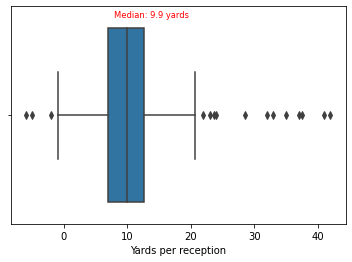

In [4]:
g = sb.boxplot(data=receiving_summary, x='yards_per_reception')
g.set_xlabel('Yards per reception')
g.text(receiving_summary['yards_per_reception'].median() - 2, -0.45,
       'Median: {} yards'.format(receiving_summary['yards_per_reception'].median()),
       size='small',color='r');

50% of the receiving players had an average YPR of at least 9.9 yards, so this gives us one statistic that establishes a baseline expectation of how many yards a player is expectated to gain on one play. Note that the outliers that are points outside the whiskers of the plot are either negative or very large. These are largely data points for players who may have had very few catches at all but either did poorly and lost yards or made a huge gain down the field.  

Now let's look at a histogram showing the distribution of YPR for all players.

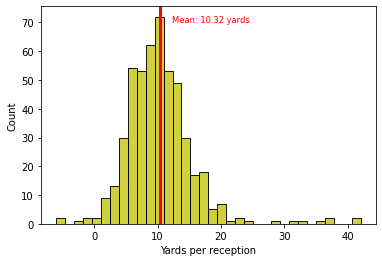

In [5]:
g = sb.histplot(data=receiving_summary, x='yards_per_reception', color='y')
g.set_xlabel('Yards per reception')
g.axvline(x=receiving_summary['yards_per_reception'].mean(), color='red', lw=3)
g.text(receiving_summary['yards_per_reception'].mean() + 2, 70,
       'Mean: {:.2f} yards'.format(receiving_summary['yards_per_reception'].mean()),
       size='small',color='r');

The mean YPR is 10.3 yards, which is slightly above the median. Both statistics give us an idea of what the expected yards per play should be for the average receiver. However, how do different positions compare, and furthermore do all positions matter when going forward with our analysis? We can answer that by plotting a box plot of YPR grouped by position.

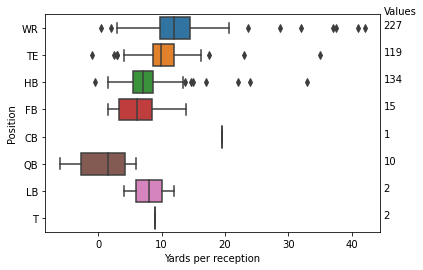

In [6]:
g = sb.boxplot(data=receiving_summary, x='yards_per_reception', y='position')
g.set_xlabel('Yards per reception')
g.set_ylabel('Position')
g.text(45, -0.5, 'Values')
for ytick in g.get_yticks():
    pos = g.get_yticklabels()[ytick].get_text()
    g.text(45, ytick, len(receiving_summary[receiving_summary['position'] == pos]))

The wide receiver (WR), tight end (TE) and running back (HB, which stands for halfback but will be referred to as running back for the sake of clarity) positions all have more than 100 players listed in the summary statistics data. Other positions do not have nearly as many players with receiving stats, so we can clean up the summary table by including only the three aforementioned positions.

In [7]:
receiving_summary = receiving_summary[receiving_summary['position'].isin(['WR', 'TE', 'HB'])]
receiving_summary['position'].value_counts()

WR    227
HB    134
TE    119
Name: position, dtype: int64

Now we can take a look at YPR distribution by position.

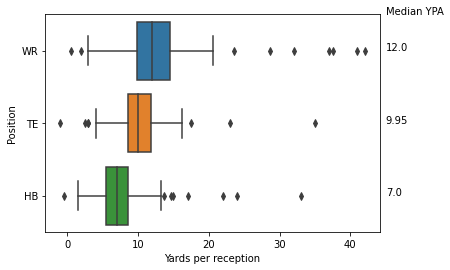

In [8]:
g = sb.boxplot(data=receiving_summary, x='yards_per_reception', y='position')
g.set_xlabel('Yards per reception')
g.set_ylabel('Position')
g.text(45, -0.5, 'Median YPA')
for ytick in g.get_yticks():
    pos = g.get_yticklabels()[ytick].get_text()
    g.text(45, ytick,
           receiving_summary[receiving_summary['position'] == pos]['yards_per_reception'].median())

The median YPA statistics show a clear pattern by high-volume positions. Wide receivers have a median YPA of 12 yards, tight ends 9.95 yards, and running backs 7 yards. This shows that wide receivers can be trusted to get more yards overall than anyone else on a passing play, but tight ends can get enough yards as well and more than running backs. With that said, YPA accounts for both the depth of the catch and the receiver's yards after the catch (YAC). How does that compare between positions?

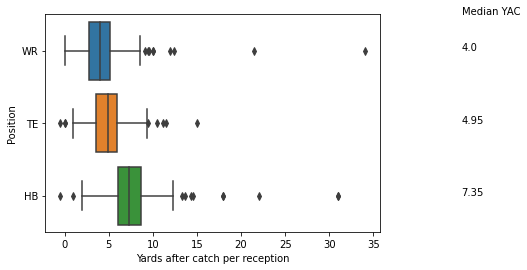

In [9]:
g = sb.boxplot(data=receiving_summary, x='yards_after_catch_per_reception', y='position')
g.set_xlabel('Yards after catch per reception')
g.set_ylabel('Position')
g.text(45, -0.5, 'Median YAC')
for ytick in g.get_yticks():
    pos = g.get_yticklabels()[ytick].get_text()
    g.text(45, ytick,
           receiving_summary[receiving_summary['position'] == pos]['yards_after_catch_per_reception'].median())